# Оценка стоимости недвижимости с помощью нейронной сети


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Горячев Илья 19-Ас
Вариант 3


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/"

'Colab Notebooks'   macro.csv   test.csv   train.csv


Загрузка данных с Google Drive

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/train.csv")

Отображение загруженных данных

In [ ]:
data

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,Investment,Otradnoe,1.005305e+07,175518,0.096270,0.300323,9753,5088.0,4,10311,12721.0,4,0,NaN,1,0,10,3,no,0,9,6,no,yes,no,yes,no,no,no,...,647.89,1112.68,880.28,8,20,30,15,5,1,0,5,12,1,0,29,3,15.52,17.24,44,838601,53,2548292,207,689.95,1156.08,923.02,18,63,59,47,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06

In [ ]:
data.fillna(data.mean(), inplace=True) #пустые ячейки заменяем средним значением



In [ ]:
data

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.000000,5,10309,11065.000000,5,0,240.000000,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.000000,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.000000,5,7759,6237.000000,8,0,229.000000,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.000000,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.000000,4,6207,5580.000000,7,0,1183.000000,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.000000,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.000000,9,13670,17063.000000,10,0,1190.738677,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.000000,7,6748,7770.000000,9,0,562.000000,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,Inve

Удаление столбца ID и timestap из набора данных

In [ ]:
features = data.drop(columns=['id','timestamp'])#удаляем ненужные столбцы разделяем x y 

In [ ]:
features = data.drop(['id', 'timestamp', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'culture_objects_top_25'], axis=1)

In [ ]:
features

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43,27.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.000000,5,10309,11065.000000,5,0,240.000000,1,0,7,3,0,16,1,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,34,19.000000,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.000000,5,7759,6237.000000,8,0,229.000000,1,0,6,1,1,3,0,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,43,29.000000,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.000000,4,6207,5580.000000,7,0,1183.000000,1,0,5,1,0,0,1,101982,46076,55906,13028,6835,6193,63388,31813,31575,25292,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,89,50.000000,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.000000,9,13670,17063.000000,10,0,1190.738677,1,0,17,6,0,11,4,21155,9828,11327,28563,14680,13883,120381,60040,60341,29529,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,77,77.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.000000,7,6748,7770.000000,9,0,562.000000,4,2,25,2,0,10,93,28179,13522,14657,13368,7159,6209,68043,34236,33807,26760,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.00

Переводим product_type и sub_area в числа

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
features.sub_area=le.fit_transform(features.sub_area)

In [ ]:
ley = preprocessing.LabelEncoder()
features['sub_area']=ley.fit_transform(features['sub_area'])

In [ ]:
leye = preprocessing.LabelEncoder()
features.product_type=leye.fit_transform(features.product_type)

In [ ]:
features

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43,27.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,9,6.407578e+06,155572,0.189727,0.000070,9576,5001.000000,5,10309,11065.000000,5,0,240.000000,1,0,7,3,0,16,1,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,34,19.000000,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,70,9.589337e+06,115352,0.372602,0.049637,6880,3119.000000,5,7759,6237.000000,8,0,229.000000,1,0,6,1,1,3,0,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,43,29.000000,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,129,4.808270e+06,101708,0.112560,0.118537,5879,1463.000000,4,6207,5580.000000,7,0,1183.000000,1,0,5,1,0,0,1,101982,46076,55906,13028,6835,6193,63388,31813,31575,25292,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,89,50.000000,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,65,1.258354e+07,178473,0.194703,0.069753,13087,6839.000000,9,13670,17063.000000,10,0,1190.738677,1,0,17,6,0,11,4,21155,9828,11327,28563,14680,13883,120381,60040,60341,29529,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,77,77.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,6,8.398461e+06,108171,0.015234,0.037316,5706,3240.000000,7,6748,7770.000000,9,0,562.000000,4,2,25,2,0,10,93,28179,13522,14657,13368,7159,6209,68043,34236,33807,26760,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,0,82,1.005305e+07,175518,0.096270,0.300323,9753,5088.000000,4,10311,12721.000000,4,0,

In [ ]:
features.fillna(0)#Nan преобразовывает в 0

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43,27.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,9,6.407578e+06,155572,0.189727,0.000070,9576,5001.000000,5,10309,11065.000000,5,0,240.000000,1,0,7,3,0,16,1,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,34,19.000000,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,70,9.589337e+06,115352,0.372602,0.049637,6880,3119.000000,5,7759,6237.000000,8,0,229.000000,1,0,6,1,1,3,0,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,43,29.000000,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,129,4.808270e+06,101708,0.112560,0.118537,5879,1463.000000,4,6207,5580.000000,7,0,1183.000000,1,0,5,1,0,0,1,101982,46076,55906,13028,6835,6193,63388,31813,31575,25292,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,89,50.000000,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,65,1.258354e+07,178473,0.194703,0.069753,13087,6839.000000,9,13670,17063.000000,10,0,1190.738677,1,0,17,6,0,11,4,21155,9828,11327,28563,14680,13883,120381,60040,60341,29529,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,77,77.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,6,8.398461e+06,108171,0.015234,0.037316,5706,3240.000000,7,6748,7770.000000,9,0,562.000000,4,2,25,2,0,10,93,28179,13522,14657,13368,7159,6209,68043,34236,33807,26760,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,0,82,1.005305e+07,175518,0.096270,0.300323,9753,5088.000000,4,10311,12721.000000,4,0,

Нормировка данных так, чтобы среднее = 0, стандартное отклонение = 1

количество данных небольшое, поэтому нужно привести все признаки одной шкале для этого используется стандартизация данных

In [ ]:
# Среднее значение
mymean = features.mean(axis=0)
# Стандартное отклонение
mystd = features.std(axis=0)
features -= mymean#нормируем каждый стобец на среднее и стандартное отклонение
features /= mystd

In [ ]:
features

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,-0.294868,-1.592522e-01,-0.691901,7.619041e-14,-7.783812e-14,-3.816606e-15,-5.854598e-14,1.088935e-14,-1.747374e-13,-0.752845,-1.719242,-0.544779,1.235770,-0.166744,-1.000959,1.162277,9.023564e-01,0.312276,1.241899,7.229520e-01,0.085620,-0.329039,-1.240118e+00,-0.214947,-0.311619,0.055534,0.031491,-0.189827,2.488294,-0.308173,-0.212349,-0.206504,-0.217207,1.203576,1.235697,1.167002,1.188230,1.321253,1.046798,1.290448,...,-0.572861,-0.586937,-0.582482,-0.124689,-0.094423,-0.121537,-0.150800,-0.249990,-0.215968,-0.254776,-0.267468,-0.321423,-0.444546,-0.293920,0.040368,-0.581079,-0.863593,0.523929,-0.272666,-0.257776,0.914065,2.849041,-0.220641,-0.372721,-0.393828,-0.385928,-0.174544,-0.215950,-0.201656,-0.189155,-0.313865,-0.238989,-0.326969,-0.070249,-0.174274,0.915161,-0.420238,-0.017208,-0.406419,-0.266319
1,-0.531514,-3.313406e-01,-0.880388,7.619041e-14,-7.783812e-14,-3.816606e-15,-5.854598e-14,1.088935e-14,-1.747374e-13,-0.752845,-0.165287,-0.390696,0.540779,0.877718,-0.583331,0.455893,-7.943681e-02,0.312276,0.602744,-5.509075e-01,0.956420,-0.329039,-1.254466e+00,-0.214947,-0.311619,-0.096627,-0.576401,0.472210,-0.253274,-0.350659,-0.247406,-0.254996,-0.240932,0.548771,0.514835,0.583748,0.440889,0.441858,0.437565,0.775826,...,-0.612119,-0.567254,-0.585657,-0.343958,-0.233647,-0.279745,-0.320159,-0.274214,-0.215968,-0.254776,-0.332346,-0.205078,-0.444546,0.161013,-0.065767,-0.581079,-1.116081,3.029163,-0.034480,0.559869,0.412478,0.856949,-0.172054,-0.601911,-0.550813,-0.571413,-0.264717,-0.136543,-0.066914,-0.221393,-0.232195,-0.274218,-0.326969,-0.001564,-0.026432,0.915161,0.065653,0.285216,1.638898,-0.234939
2,-0.294868,-1.162301e-01,-1.068876,7.619041e-14,-7.783812e-14,-3.816606e-15,-5.854598e-14,1.088935e-14,-1.747374e-13,-0.752845,1.337718,-0.622229,0.305014,-0.607473,-0.002813,0.193620,-9.433314e-01,-0.021749,0.213736,-7.242558e-01,0.666154,-0.329039,-1.009412e-02,-0.214947,-0.311619,-0.248788,-0.576401,-0.189827,-0.885944,-0.308173,-0.156609,-0.163250,-0.150964,0.223118,0.259891,0.183554,0.259316,0.240740,0.276809,0.461664,...,-0.310713,-0.261937,-0.281358,-0.289141,-0.261492,-0.193450,-0.249593,-0.249990,-0.215968,-0.254776,-0.397223,-0.049950,-0.444546,-0.293920,-0.012700,1.620072,-0.810062,1.987085,-0.182541,0.033478,0.203483,0.397208,-0.278946,-0.411557,-0.348221,-0.373452,-0.234659,-0.295356,-0.225434,-0.310048,-0.300254,-0.274218,-0.326969,-0.138933,-0.068673,-0.726150,-0.225882,0.306818,0.820771,-0.297699
3,0.914656,3.355021e-01,0.250537,7.619041e-14,-7.783812e-14,-3.8166

In [ ]:
features.describe() #среднее стандартное отклонение


,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,...,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04
mean,2.405210e-16,-4.639873e-14,-9.078390e-16,7.610032e-14,-7.757179e-14,-3.772577e-15,-5.922311e-14,1.051977e-14,-1.763971e-13,-1.822140e-14,-6.789475e-16,3.965166e-14,1.336422e-15,-7.066855e-14,1.712828e-14,-1.619991e-16,-1.870780e-13,-6.470096e-15,3.536930e-16,-2.394577e-13,6.741168e-16,-1.749413e-15,2.255318e-13,5.005422e-16,-1.088770e-15,-7.008645e-16,7.841699e-16,-1.963336e-15,-3.682252e-17,5.900913e-15,-4.659723e-17,4.983834e-16,-3.724317e-16,2.304783e-15,4.950177e-16,1.741539e-16,-3.159496e-16,-4.236706e-16,-6.076577e-16,-7.738660e-16,...,7.781304e-14,1.261423e-13,3.954179e-14,7.132339e-16,2.590092e-16,-1.548722e-15,-1.311328e-15,-5.851634e-16,-2.238801e-15,-7.930117e-15,7.706451e-17,-7.165085e-16,-9.209313e-15,4.541088e-15,-6.227374e-16,-4.140970e-15,-1.112347e-14,9.637787e-15,9.244663e-16,2.042204e-17,-5.802319e-16,-3.020932e-16,7.322149e-16,3.308465e-14,-9.554928e-16,-3.213103e-13,-3.007633e-16,5.114109e-16,-3.354425e-17,-4.283509e-16,-2.621551e-15,1.477740e-15,6.711302e-15,1.755667e-15,-2.158797e-17,1.184943e-14,-1.731101e-15,-5.189463e-16,-4.388932e-15,3.525598e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e

In [ ]:
features=features.dropna(axis='columns')#удаляем Nan


In [ ]:
features.describe()#среднее стандартное отклонение

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,...,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04,3.047100e+04
mean,2.405210e-16,-4.639873e-14,-9.078390e-16,7.610032e-14,-7.757179e-14,-3.772577e-15,-5.922311e-14,1.051977e-14,-1.763971e-13,-1.822140e-14,-6.789475e-16,3.965166e-14,1.336422e-15,-7.066855e-14,1.712828e-14,-1.619991e-16,-1.870780e-13,-6.470096e-15,3.536930e-16,-2.394577e-13,6.741168e-16,-1.749413e-15,2.255318e-13,5.005422e-16,-1.088770e-15,-7.008645e-16,7.841699e-16,-1.963336e-15,-3.682252e-17,5.900913e-15,-4.659723e-17,4.983834e-16,-3.724317e-16,2.304783e-15,4.950177e-16,1.741539e-16,-3.159496e-16,-4.236706e-16,-6.076577e-16,-7.738660e-16,...,7.781304e-14,1.261423e-13,3.954179e-14,7.132339e-16,2.590092e-16,-1.548722e-15,-1.311328e-15,-5.851634e-16,-2.238801e-15,-7.930117e-15,7.706451e-17,-7.165085e-16,-9.209313e-15,4.541088e-15,-6.227374e-16,-4.140970e-15,-1.112347e-14,9.637787e-15,9.244663e-16,2.042204e-17,-5.802319e-16,-3.020932e-16,7.322149e-16,3.308465e-14,-9.554928e-16,-3.213103e-13,-3.007633e-16,5.114109e-16,-3.354425e-17,-4.283509e-16,-2.621551e-15,1.477740e-15,6.711302e-15,1.755667e-15,-2.158797e-17,1.184943e-14,-1.731101e-15,-5.189463e-16,-4.388932e-15,3.525598e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e

In [ ]:
y = data.iloc[:, 13]

In [ ]:
y

0        6.407578e+06
1        9.589337e+06
2        4.808270e+06
3        1.258354e+07
4        8.398461e+06
             ...     
30466    1.005305e+07
30467    7.307411e+06
30468    2.553630e+07
30469    6.050065e+06
30470    4.395333e+06
Name: area_m, Length: 30471, dtype: float64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split#делает выборку на обучающую и тестовую

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=42)

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 97 kB 3.2 MB/s 


In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import utils
from google.colab import files
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import sys


In [ ]:
def build_model(hp):
  model = Sequential()

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
    min_value=128, # минимальное количество нейронов - 128
    max_value=1024, # максимальное количество - 1024
    step=32), input_shape=(X_train.shape[1],), activation='relu'))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])
  
  return model

In [ ]:
rm -Rf /content/test_directory

In [ ]:
tuner = RandomSearch(
  build_model, # функция создания модели
  objective='val_mae', # метрика, которую нужно оптимизировать   доля правильных ответов на проверочном наборе данных
  max_trials=5, # максимальное количество запусков обучения
  directory='test_directory' # каталог, куда сохраняются обученные сети
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 1024, 'step': 32, 'sampling': None}


In [ ]:
tuner.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 00m 21s]
val_mae: 17163460.0

Best val_mae So Far: 16253852.0
Total elapsed time: 00h 02m 11s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in test_directory/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
units_input: 896
Score: 16253852.0
Trial summary
Hyperparameters:
units_input: 768
Score: 16448622.0
Trial summary
Hyperparameters:
units_input: 448
Score: 16919840.0
Trial summary
Hyperparameters:
units_input: 288
Score: 17163460.0
Trial summary
Hyperparameters:
units_input: 160
Score: 17355428.0


In [ ]:
models = tuner.get_best_models(num_models=3)

In [ ]:
for model in models:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 896)               249088    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 897       
Total params: 249,985
Trainable params: 249,985
Non-trainable params: 0
_________________________________________________________________
315/315 [==============================] - 1s 3ms/step - loss: 623699178815488.0000 - mae: 15964652.0000

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 768)               213504    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 769       
Total params: 214,273
Trainable params: 214,273
Non-trai

In [ ]:
def build_model2(hp):
  model = Sequential()

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
    min_value=512, # минимальное кол ичество нейронов - 128
    max_value=1024, # максимальное количество - 1024
    step=32), input_shape=(X_train.shape[1],), activation='relu'))
  
  model.add(Dense(units=hp.Int('units_hidden', min_value=128, max_value=600, step=32), activation='relu'))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])
  return model

In [ ]:
rm -Rf /content/test_directory2

In [ ]:
tuner2 = BayesianOptimization(
  build_model2, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory2' # каталог, куда сохраняются обученные сети
)

In [ ]:
tuner2.search_space_summary()

Search space summary
Default search space size: 2
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}


In [ ]:
tuner2.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 01m 14s]
val_mae: 3658127.5

Best val_mae So Far: 3596821.0
Total elapsed time: 00h 06m 13s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner2.results_summary()

Results summary
Results in test_directory2/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
units_input: 1024
units_hidden: 576
Score: 3596821.0
Trial summary
Hyperparameters:
units_input: 1024
units_hidden: 576
Score: 3658127.5
Trial summary
Hyperparameters:
units_input: 800
units_hidden: 576
Score: 3856028.5
Trial summary
Hyperparameters:
units_input: 896
units_hidden: 384
Score: 3990625.75
Trial summary
Hyperparameters:
units_input: 512
units_hidden: 576
Score: 4060764.75


In [ ]:
models2 = tuner2.get_best_models(num_models=3)

In [ ]:
for model in models2:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              284672    
_________________________________________________________________
dense_1 (Dense)              (None, 576)               590400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 577       
Total params: 875,649
Trainable params: 875,649
Non-trainable params: 0
_________________________________________________________________
315/315 [==============================] - 2s 4ms/step - loss: 36612247388160.0000 - mae: 3451779.0000

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              284672    
__________________________________________________________

In [ ]:
def build_model3(hp):
  model = Sequential()

  activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
                               min_value=512, # минимальное количество нейронов - 128
                               max_value=1024, # максимальное количество - 1024
                               step=32), input_shape=(X_train.shape[1],), activation=activation_choice))
  
  model.add(Dense(units=hp.Int('units_hidden', min_value=128, max_value=600, step=32), activation=activation_choice))
  
  model.add(Dense(1))

  model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']), loss='mse', metrics=['mae'])

  return model

In [ ]:
rm -Rf /content/test_directory3

In [ ]:
tuner3 = BayesianOptimization(
  build_model3, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory3' # каталог, куда сохраняются обученные сети
)

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        1.2G        8.8G        1.1M        2.7G         11G
Swap:            0B          0B          0B


In [ ]:
tuner3.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop', 'SGD'], 'ordered': False}


In [ ]:
tuner3.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 01m 23s]
val_mae: 9055787.0

Best val_mae So Far: 4738057.5
Total elapsed time: 00h 05m 43s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner3.results_summary()

Results summary
Results in test_directory3/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
activation: relu
units_input: 768
units_hidden: 288
optimizer: rmsprop
Score: 4738057.5
Trial summary
Hyperparameters:
activation: selu
units_input: 640
units_hidden: 576
optimizer: adam
Score: 6177162.5
Trial summary
Hyperparameters:
activation: relu
units_input: 1024
units_hidden: 128
optimizer: SGD
Score: nan
Trial summary
Hyperparameters:
activation: tanh
units_input: 576
units_hidden: 576
optimizer: SGD
Score: nan
Trial summary
Hyperparameters:
activation: selu
units_input: 512
units_hidden: 288
optimizer: rmsprop
Score: 9055787.0


In [ ]:
models3 = tuner3.get_best_models(num_models=3)

In [ ]:
for model in models3:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

In [ ]:
def build_model4(hp):

  model = Sequential()

  activation_choice = hp.Choice("activation", values=['relu', 'selu', 'elu'])
  
  model.add(Dense(units=hp.Int("units_input", min_value=32,
                               max_value=1024,
                               step=32),
                  activation=activation_choice, 
                  input_shape=(X_train.shape[1], )))
  
  model.add(Dropout(0.3))

  for i in range(hp.Choice('hidden_layers', values=[1,2,3])):
    model.add(Dense(units=hp.Int(f'layer_{i}_units_',
                                 min_value=32//(i+1),
                                 max_value=512//(i+1), 
                                 step=64//(i+1)),
                     activation=activation_choice))
  
  model.add(Dense(1))

  model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']), loss='mse', metrics=['mae'])

  model.summary()
  return model

In [ ]:
tuner4 = BayesianOptimization(
  build_model4, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory5' # каталог, куда сохраняются обученные сети
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                8896      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 9,985
Trainable params: 9,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tuner4.search_space_summary()

Search space summary
Default search space size: 5
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'selu', 'elu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 32, 'sampling': None}
hidden_layers (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2, 3], 'ordered': True}
layer_0_units_ (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 64, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop', 'SGD'], 'ordered': False}


In [ ]:
tuner4.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 01m 09s]
val_mae: 826893.9375

Best val_mae So Far: 2818769.0
Total elapsed time: 00h 05m 46s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner4.results_summary()

Results summary
Results in test_directory5/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
activation: relu
units_input: 960
hidden_layers: 3
layer_0_units_: 160
optimizer: rmsprop
layer_1_units_: 16
layer_2_units_: 10
Score: 2818769.0
Trial summary
Hyperparameters:
activation: elu
units_input: 416
hidden_layers: 2
layer_0_units_: 160
optimizer: SGD
layer_1_units_: 176
layer_2_units_: 52
Score: nan
Trial summary
Hyperparameters:
activation: elu
units_input: 608
hidden_layers: 1
layer_0_units_: 416
optimizer: SGD
layer_1_units_: 176
layer_2_units_: 31
Score: nan
Trial summary
Hyperparameters:
activation: relu
units_input: 864
hidden_layers: 3
layer_0_units_: 480
optimizer: adam
layer_1_units_: 112
layer_2_units_: 31
Score: 826893.9375
Trial summary
Hyperparameters:
activation: relu
units_input: 576
hidden_layers: 1
layer_0_units_: 480
optimizer: adam
layer_1_units_: 240
layer_2_units_: 73
Score: 4436672.5


In [ ]:
models4 = tuner4.get_best_models(num_models=3)

In [ ]:
for model in models4:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

In [ ]:
best_params = tuner4.get_best_hyperparameters()[0]
best_model = tuner4.hypermodel.build(best_params)
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 960)               266880    
_________________________________________________________________
dropout (Dropout)            (None, 960)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 160)               153760    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2576      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 423,397
Trainable params: 423,397
Non-trainable params: 0
__________________________________________________

In [ ]:
best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
511/511 [==============================] - 7s 11ms/step - loss: 669689554403328.0000 - mae: 16439892.0000 - val_loss: 352981081915392.0000 - val_mae: 11205235.0000
Epoch 2/10
511/511 [==============================] - 5s 11ms/step - loss: 183242447650816.0000 - mae: 8105846.0000 - val_loss: 127373076856832.0000 - val_mae: 7201060.0000
Epoch 3/10
511/511 [==============================] - 6s 11ms/step - loss: 113459177979904.0000 - mae: 6491855.0000 - val_loss: 96198828490752.0000 - val_mae: 6030739.5000
Epoch 4/10
511/511 [==============================] - 5s 10ms/step - loss: 86046188503040.0000 - mae: 5384278.0000 - val_loss: 73022337712128.0000 - val_mae: 4963166.0000
Epoch 5/10
511/511 [==============================] - 5s 11ms/step - loss: 66322796904448.0000 - mae: 4542963.0000 - val_loss: 55297305477120.0000 - val_mae: 4226368.5000
Epoch 6/10
511/511 [==============================] - 6s 11ms/step - loss: 50827993546752.0000 - mae: 3944425.5000 - val_loss: 43790203092

In [ ]:
#Корреляция новой модели 
predicted_y_tuner = best_model.predict(X_test)
predicted_y_tuner = np.round(predicted_y_tuner, 0)

predicted_y_tuner = np.reshape(predicted_y_tuner, (predicted_y_tuner.shape[0]))

СС_tuner = np.corrcoef(predicted_y_tuner, y_test)
СС_tuner = СС_tuner[0][1]
print(f'Коэффициент корреляции с истинными данными: {СС_tuner}')

Коэффициент корреляции с истинными данными: 0.9768145427063158


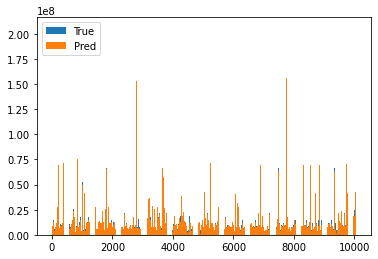

In [ ]:
from matplotlib import pyplot as plt
y_test = y_test.reset_index(drop=True)

x = np.arange(0, len(y_test))

plt.bar(x, y_test, label = 'True')
plt.bar(x, predicted_y_tuner, label = 'Pred')
plt.legend()

In [ ]:
from tensorflow.python.keras.models import Sequential#функции описывающие слои
from tensorflow.python.keras.layers import Dense

In [ ]:
model = Sequential() #создаем слои
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])#компилируем сеть

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)#обучаем mae- средняя абсол. ошибка, val_loss - валидация, val_mae - ср. абосл ошибка

Epoch 1/100
511/511 [==============================] - 3s 5ms/step - loss: 385659474804736.0000 - mae: 11584653.0000 - val_loss: 116916702150656.0000 - val_mae: 6819907.0000
Epoch 2/100
511/511 [==============================] - 2s 3ms/step - loss: 94655391727616.0000 - mae: 5737668.0000 - val_loss: 74371032940544.0000 - val_mae: 5051276.5000
Epoch 3/100
511/511 [==============================] - 2s 5ms/step - loss: 61121511817216.0000 - mae: 4353844.5000 - val_loss: 47873785856000.0000 - val_mae: 3954165.2500
Epoch 4/100
511/511 [==============================] - 2s 4ms/step - loss: 41416734539776.0000 - mae: 3569196.5000 - val_loss: 35770991640576.0000 - val_mae: 3406384.7500
Epoch 5/100
511/511 [==============================] - 2s 4ms/step - loss: 31469078577152.0000 - mae: 3100819.5000 - val_loss: 28594451513344.0000 - val_mae: 2953719.2500
Epoch 6/100
511/511 [==============================] - 2s 4ms/step - loss: 24683525177344.0000 - mae: 2727364.0000 - val_loss: 23653399920640.

In [ ]:
print(model.summary())#структура сети

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               71168     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 114,433
Trainable params: 114,433
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
pred = model.predict(X_test)#предсказание

In [ ]:
y_test = y_test.reset_index(drop=True)

In [ ]:
print("Предсказанная стоимость:", pred[12][0], ", правильная стоимость:", y_test[12])

Предсказанная стоимость: 8423759.0 , правильная стоимость: 8398460.622000001


In [ ]:
vec = np.array([])
for i in np.arange(0, len(pred)):
  vec = np.append(vec, pred[i][0])
vec  

array([16739166.,  3221586., 15136199., ..., 18800340.,  5433857.,
       40468360.])

In [ ]:
diff = np.array([])

for i in np.arange(0, len(y_test)):
    diff = np.append(diff, np.abs(pred[i][0] - y_test[i]))

In [ ]:
for i in np.arange(0, len(y_test)):print("Предсказанная стоимость:", pred[i][0], ", правильная стоимость:", y_test[i], 'разница: ', np.abs(pred[i][0] - y_test[i]))

Выходные данные были обрезаны до нескольких последних строк (5000).
Предсказанная стоимость: 17585988.0 , правильная стоимость: 17526506.21 разница:  59481.789999999106
Предсказанная стоимость: 10558857.0 , правильная стоимость: 10518366.87 разница:  40490.13000000082
Предсказанная стоимость: 8026420.0 , правильная стоимость: 7905261.321 разница:  121158.67899999954
Предсказанная стоимость: 25696388.0 , правильная стоимость: 25536296.81 разница:  160091.19000000134
Предсказанная стоимость: 7632554.5 , правильная стоимость: 7759253.984 разница:  126699.48400000017
Предсказанная стоимость: 4875385.0 , правильная стоимость: 4808269.831 разница:  67115.16899999976
Предсказанная стоимость: 14924804.0 , правильная стоимость: 14795571.25 разница:  129232.75
Предсказанная стоимость: 8543770.0 , правильная стоимость: 8287309.438999999 разница:  256460.5610000007
Предсказанная стоимость: 11369010.0 , правильная стоимость: 11324091.93 разница:  44918.0700000003
Предсказанная стоимость: 14978745.0

In [ ]:
np.sort(diff)[-10:-1]

array([ 4485469.2       ,  4512697.7       ,  5012502.69      ,
        5068518.56999999,  5453710.56999999,  7917738.59999999,
        9748193.2       , 13224175.57      , 13234381.57      ])

In [ ]:
vec

array([16739166.,  3221586., 15136199., ..., 18800340.,  5433857.,
       40468360.])

In [ ]:
sorted = np.sort(pred, )
sorted

array([[16739166.],
       [ 3221586.],
       [15136199.],
       ...,
       [18800340.],
       [ 5433857.],
       [40468360.]], dtype=float32)

In [ ]:
СС_tuner = np.corrcoef(vec, y_test)
СС_tuner = СС_tuner[0][1]
print(f'Коэффициаент корреляция с истинными данными: {СС_tuner}')

Коэффициаент корреляция с истинными данными: 0.9998741071216798
